In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

device = 'cuda:0'


# 2d pose estimator - pretrained
class CPM2DPose(nn.Module):
    def __init__(self):
        super(CPM2DPose, self).__init__()

        self.scoremap_list = []
        self.layers_per_block = [2, 2, 4, 2]
        self.out_chan_list = [64, 128, 256, 512]
        self.pool_list = [True, True, True, False]

        self.relu = F.leaky_relu
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_1
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_3 = nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_4 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_7 = nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv5_1 = nn.Conv2d(128, 512, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv5_2 = nn.Conv2d(512, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv6_1 = nn.Conv2d(149, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_2 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_3 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_4 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_5 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_6 = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv6_7 = nn.Conv2d(128, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv7_1 = nn.Conv2d(149, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_2 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_3 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_4 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_5 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_6 = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv7_7 = nn.Conv2d(128, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.conv1_1(x))
        x = self.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2_1(x))
        x = self.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3_1(x))
        x = self.relu(self.conv3_2(x))
        x = self.relu(self.conv3_3(x))
        x = self.relu(self.conv3_4(x))
        x = self.maxpool(x)
        x = self.relu(self.conv4_1(x))
        x = self.relu(self.conv4_2(x))
        x = self.relu(self.conv4_3(x))
        x = self.relu(self.conv4_4(x))
        x = self.relu(self.conv4_5(x))
        x = self.relu(self.conv4_6(x))
        encoding = self.relu(self.conv4_7(x))
        x = self.relu(self.conv5_1(encoding))
        scoremap = self.conv5_2(x)

        x = torch.cat([scoremap, encoding], 1)
        x = self.relu(self.conv6_1(x))
        x = self.relu(self.conv6_2(x))
        x = self.relu(self.conv6_3(x))
        x = self.relu(self.conv6_4(x))
        x = self.relu(self.conv6_5(x))
        x = self.relu(self.conv6_6(x))
        scoremap = self.conv6_7(x)
        x = torch.cat([scoremap, encoding], 1)
        x = self.relu(self.conv7_1(x))
        x = self.relu(self.conv7_2(x))
        x = self.relu(self.conv7_3(x))
        x = self.relu(self.conv7_4(x))
        x = self.relu(self.conv7_5(x))
        x = self.relu(self.conv7_6(x))
        x = self.conv7_7(x)
        return x

In [ ]:
gc.collect()
torch.cuda.empty_cache()

Finish build model.
train


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


Training...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
Finish training.
Finish build model.


100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


Testing...
accuracy
0.3333333333333333
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[array([0.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([2.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32)]


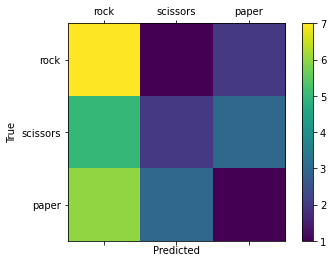

In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn
import gc

import math
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm, metrics

device = 'cuda:0'
num_joints = 21

categories = ['rock', 'scissors', 'paper']

# Rock Scissors Paper dataset
class RSPdataset(Dataset):
    def __init__(self, method=None):
        self.root = '/content/gdrive/My Drive/'
        self.x_data = []
        self.y_data = []
        self.len = 0
        
        if method == 'train':
            self.root = self.root + 'RSPdataset/train/'
            print('train')
            for idx, category in enumerate(categories):
                dir_path = self.root + category + '/'
                self.img_path = sorted(glob(dir_path + 'rgb/*.jpg'))

                for i in tqdm.tqdm(range(len(self.img_path))):
                    img = cv2.imread(self.img_path[i], cv2.IMREAD_COLOR)
                    b, g, r = cv2.split(img)
                    img = cv2.merge([r, g, b])
                    self.x_data.append(img)
                    self.y_data.append(idx)

                    self.len = self.len + 1


        elif method == 'test':
            self.root = self.root + 'RSPdataset/test/'
            for idx, category in enumerate(categories):
                dir_path = self.root + category + '/'
                self.img_path = sorted(glob(dir_path + 'rgb/*.jpg'))

                for i in tqdm.tqdm(range(len(self.img_path))):
                    img = cv2.imread(self.img_path[i], cv2.IMREAD_COLOR)
                    b, g, r = cv2.split(img)
                    img = cv2.merge([r, g, b])
                    self.x_data.append(img)
                    self.y_data.append(idx)

                    self.len = self.len + 1


    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])

        return new_x_data, self.y_data[idx]


class Trainer(object):
    def __init__(self, epochs, batch_size, lr):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = lr
        self._build_model()

        self.dataset = RSPdataset(method='train')
        self.root = self.dataset.root
        #self.dataloader = DataLoader(self.dataset, batch_size=self.batch_size, shuffle=True)

        # Load of finetunedweight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Training...")

    def _build_model(self):
        gc.collect()
        torch.cuda.empty_cache()

        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)
        self.poseNet.train()

        print('Finish build model.')

    def train(self):
        date = '201105'

        svm_model_file = '/content/gdrive/My Drive/CV_Final/svmmodel.xml'
        svm = cv2.ml.SVM_create()
        svm.setKernel(cv2.ml.SVM_LINEAR)
        
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.dataset.x_data[0])
        new_x_data = new_x_data[None, :, :]

        heatmapsPoseNet = self.poseNet(new_x_data.cuda()).cpu().detach().numpy()
        skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)

        for i in range(1, len(self.dataset.x_data)):
            x = transform1(self.dataset.x_data[i])
            x = x[None, :, :]

            heat = self.poseNet(x.cuda()).cpu().detach().numpy()
            skele = self.heatmap2skeleton(heat)
            skeletons_in = np.concatenate((skeletons_in, skele), axis = 0)
            

        labels = np.array(self.dataset.y_data)
        skeletons_in = np.reshape(skeletons_in,(len(self.dataset.x_data),num_joints*2))

        svm.train(skeletons_in.astype('float32'), cv2.ml.ROW_SAMPLE, labels)
        svm.save(svm_model_file)

        print(labels)

        print('Finish training.')

    
    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons


class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        self.dataset = RSPdataset(method='test')
        self.root = self.dataset.root
        #self.dataloader = DataLoader(self.dataset, batch_size=self.batch_size, shuffle=False)
        #self.datalen = self.dataset.__len__()
        #self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        svm_model_file = '/content/gdrive/My Drive/CV_Final/svmmodel.xml'
        self.svmmodel = cv2.ml.SVM_create()
        self.svmmodel = self.svmmodel.load(svm_model_file)

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def test(self):
        correct = 0   # correct
        img_num = 0   # total number of img
        results = []

        transform1 = torchvision.transforms.ToTensor()

        for i in range(0, len(self.dataset.x_data)):
            x = transform1(self.dataset.x_data[i])
            x = x[None, :, :]

            heatmapsPoseNet = self.poseNet(x.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
            skeletons_in = np.reshape(skeletons_in,(1,num_joints*2))
            ret, result = self.svmmodel.predict(skeletons_in.astype('float32'))
            results.append(result[0])

            if result == self.dataset.y_data[i]:
                correct = correct + 1
            img_num = img_num + 1
        
        print('accuracy')
        print(correct/img_num)

        # now to get confusion matrix one can use the confusion_matrix
        # utility provided by sklearn
        print(self.dataset.y_data)
        print(results)
        conf_mat = confusion_matrix(self.dataset.y_data, results)

        # now it's time to plot the matrix
        # some standard matplotlib code
        # add a subplot
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # plot the matrix
        cax = ax.matshow(conf_mat)

        # add colorbar for reference
        fig.colorbar(cax)

        plt.xticks(np.arange(len(categories)), categories)
        plt.yticks(np.arange(len(categories)), categories)

        # add labels to plot
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig("Conf_Mat.jpg")
        plt.show()

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons
    

def main():

    epochs = 100
    batchSize = 25
    learningRate = 5e-3

    trainer = Trainer(epochs, batchSize, learningRate)
    trainer.train()

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()

Finish build model.
/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000004.jpg
/content/gdrive/My Drive/RSPdataset/test/scissors/meta/00000004.pkl
Testing...
3-1)


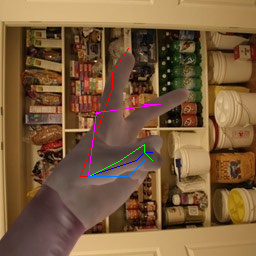

err : 
38.27767733461498


In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn

from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

device = 'cuda:0'
num_joints = 21

class imgData():
    def __init__(self, method=None):
        self.x_data = []
        self.y_data = []
        self.img_path = '/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000004.jpg'

        img = cv2.imread(self.img_path, cv2.IMREAD_COLOR)
        print(self.img_path)
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        self.x_data.append(img)

        img_pkl = '/content/gdrive/My Drive/RSPdataset/test/scissors/meta/00000004.pkl'
        print(img_pkl)
        pkl = pandas.read_pickle(img_pkl)
        coords_2d = pkl['coords_2d']
        self.y_data.append(coords_2d)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])

        return new_x_data, self.y_data[idx]



class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        dataset = imgData()
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.datalen = dataset.__len__()
        self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/_201105_30_model.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons

    def test(self):
        for batch_idx, samples in enumerate(self.dataloader):
            x_test, y_test = samples
            heatmapsPoseNet = self.poseNet(x_test.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
        
            # 3-1)
            print('3-1)')
            self.plot_hand(skeletons_in[0], '00000004')

            print('err : ')
            print(self.calc_error(skeletons_in[0], y_test.numpy()[0]))

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # 3-1)
    # visualize skeleton estimation results
    # input : skeletons(prediction), img_num
    def plot_hand(self, skeletons, img_num):
        img_path = '/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/' + img_num + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        left,right = np.hsplit(skeletons, 2)
        skeletons = np.hstack([right, left])

        thumb = np.array(skeletons[0:5], dtype=np.int32)
        cv2.polylines(img, [thumb], False, (0,0,255))

        index = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[5:9], dtype=np.int32)])
        cv2.polylines(img, [index], False, (255,0,255))

        middle = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[9:13], dtype=np.int32)])
        cv2.polylines(img, [middle], False, (255,0,0))

        ring = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[13:17], dtype=np.int32)])
        cv2.polylines(img, [ring], False, (0,255,0))

        pinky = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[17:20], dtype=np.int32)])
        cv2.polylines(img, [pinky], False, (255,122,0))

        cv2_imshow(img)


def main():

    epochs = 100
    batchSize = 25
    learningRate = 5e-3

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()